<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/2/22/Logo_exactas.svg/800px-Logo_exactas.svg.png" alt="Logo Exactas UBA" style="width:100px;">
<img src="
https://ic.fcen.uba.ar/images/logo.png" alt="Logo Instituto de Cálculo" style="width:100px;">

# **TP2 LDD Futbol Analytics** 
### Participantes: Joaquín Koifman y Tobías Palacín Roitbarg


In [1]:
# Importación de librerías
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, mean_squared_error
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.linear_model import LinearRegression

## 1. Preprocesamiento

In [2]:
# 1. Cargar en un DataFrame los datos del archivo FBRef2020-21.csv.
data_futbol = pd.read_csv('FBRef2020-21.csv')
data_futbol.head()

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


In [3]:
# 2. Eliminar a los jugadores que jugaron menos de 500 minutos en la temporada (columna Min).
data_futbol.drop(data_futbol[(data_futbol['Min'] < 500)].index, inplace=True)
data_futbol


,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
2819,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
2820,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
2821,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [4]:
# 3. Eliminar los datos faltantes. Por ejemplo, eliminar columnas con más de 100 datos faltantes y luego 
# las filas con datos faltantes, o convertir los datos faltantes a algún valor apropiado.
data_futbol.dropna(axis=1, thresh=len(data_futbol) - 100, inplace=True)
data_futbol.dropna(inplace=True)

In [5]:
# 4. Al finalizar la limpieza de datos, resetear los índices.
data_futbol.reset_index(drop=True, inplace=True)
data_futbol

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,76.3,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78
1898,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,138.4,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26
1899,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,141.8,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21
1900,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,102.0,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15


In [6]:
# 5. Definir el DataFrame data_num que solo contenga las variables númericas, a partir de la columna Ast/90, inclusive. 
# Para clustering y clasificación no vamos a utilizar las variables categóricas ni edad ni minutos jugados.
print(data_futbol.columns)
data_num = data_futbol.select_dtypes(include='number').loc[:, 'Ast/90':]
data_num.head()


Index(['Player', 'Nation', 'Pos', 'Squad', 'Comp', 'Age', 'Born', 'MP',
       'Starts', 'Min',
       ...
       'PrgDistCarry/90', 'ProgCarry/90', 'CarryIntoThird/90',
       'CarryIntoBox/90', 'Miscontrol/90', 'Dispossessed/90', 'PassTarget/90',
       'PassesReceived/90', 'PassRec%', 'ProgPassReceived/90'],
      dtype='object', length=122)


,Ast/90,npG/90,npG+A/90,xA/90,npxG/90,npxG+xA/90,Shots/90,SoTs/90,FKSht/90,np:G-xG,...,PrgDistCarry/90,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90
0,0.05,0.00,0.05,0.04,0.06,0.10,0.91,0.30,0.15,-0.06,...,96.8,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34
1,0.00,0.09,0.09,0.01,0.05,0.06,0.47,0.16,0.00,0.04,...,130.5,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22
2,0.00,0.00,0.00,0.00,0.08,0.09,0.93,0.21,0.00,-0.09,...,117.9,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00
3,0.00,0.07,0.07,0.03,0.05,0.08,0.66,0.15,0.00,0.02,...,92.7,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59
4,0.03,0.00,0.03,0.03,0.03,0.06,0.26,0.00,0.00,-0.03,...,166.3,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70


## 2. Clustering

6. Nuestro primer objetivo es realizar algún agrupamiento de jugadores con características similares.

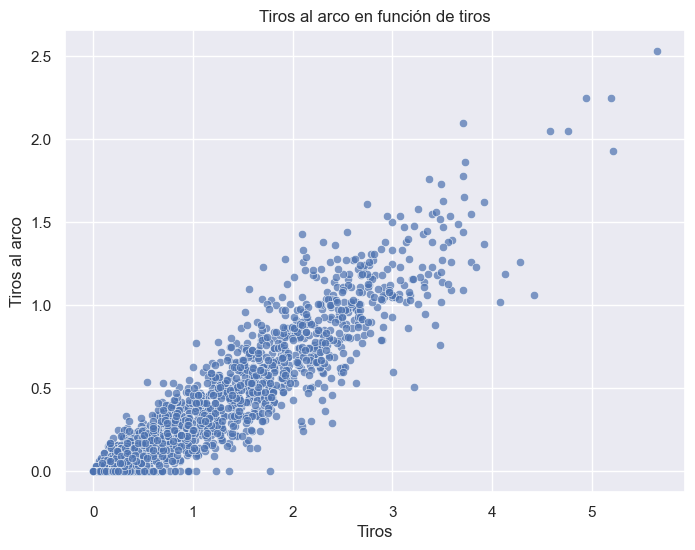

In [7]:
# (a) Seleccionar dos variables cualesquiera de los datos y realizar un gráfico de dispersión de una variable en función 
# de la otra para el total de las observaciones. ¿Pueden encontrar fácilmente grupos distintos?

sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data_num, x='Shots/90', y='SoTs/90', alpha=0.7)
plt.title('Tiros al arco en función de tiros')
plt.xlabel('Tiros')
plt.ylabel('Tiros al arco')
plt.show()

Lo primero que observamos es que existe una relación de proporcionalidad directa entre patear más veces y tener más tiros al arco. Luego, en relación a los clústeres, podemos ver que parecieran haber dos.  
Por un lado está la nube densa que tiene forma de recta con pendiente positiva que ocupa la mayoría del gráfico. Este clúster representa a todos los jugadores con menos de 4 tiros en los 90 minutos, independientemente de cúantos hayan ido al arco.
Por el otro lado, podemos ver un clúster más aislado que representea a los jugadores que patearon aproximadamente 5 veces al arco (son solamente 6). Es un dato no menor que 5 de estos 6 jugadores patearon al menos dos de sus 5/6 tiros al arco. 

[[-2.91448921  2.25129977]
 [-6.81841064 -1.41378946]
 [-6.47428099 -3.79253435]
 ...
 [ 6.80094942  1.47030389]
 [ 6.84863946 -0.87812123]
 [ 2.45963356  2.03690652]]


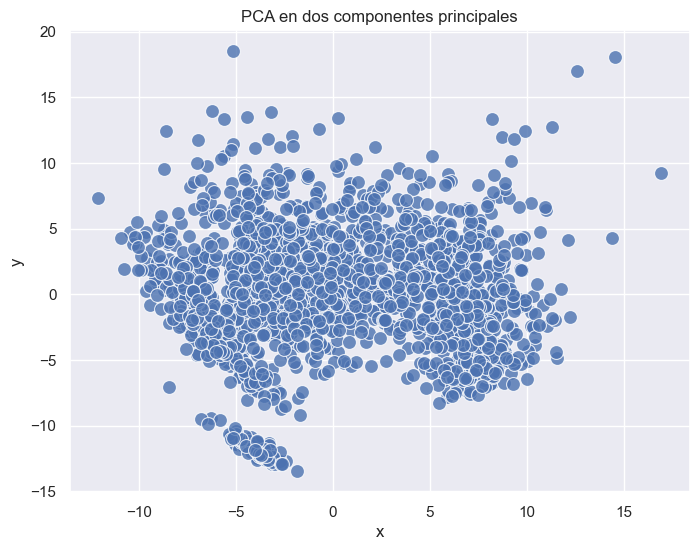

In [8]:
#(b) Escalar los datos y realizar un análisis de componentes principales, quedándose solo con las dos primeras componentes. 
# Realizar un gráfico como el del punto anterior. ¿Cuántos clusters puede distinguir en el gráfico? 
# ¿A qué características de los jugadores pueden corresponder los clusters? 
# ¿Cómo pueden verificar su conjetura? (realizar una visualización o algún cálculo)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(data_num) # Escalar los datos

pca = PCA(n_components=2)
componentes_principales = pca.fit_transform(df_scaled) # Aplicar PCA
print(componentes_principales)

df_pca = pd.DataFrame(data=componentes_principales, columns=['x', 'y']) # Generar un nuevo DataFrame con las componentes principales

# Gráfico
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='x', y='y', data=df_pca, s=100, alpha=0.8)
plt.title('PCA en dos componentes principales')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Ahora podemos distinguir a los dos clústeres con mayor claridad. Se puede observar una nube grande predominando en el centro del gráfico y otra menor por debajo.

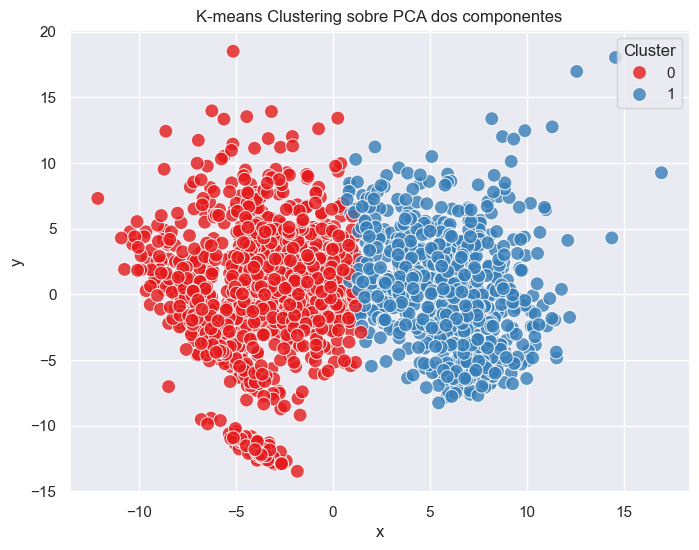

In [44]:
# (c) Para la cantidad de clusters observados en el ítem anterior, realizar un agrupamiento por k-medias, 
# y colorear los puntos según las etiquetas obtenidas. ¿Coinciden las etiquetas con lo esperado?

num_clusters = 2  # Determinar el número de clústers

kmeans = KMeans(n_clusters=num_clusters, random_state=42) # Aplicar k-means
df_pca['Cluster'] = kmeans.fit_predict(df_scaled)

# Graficar el resultado
plt.figure(figsize=(8, 6)) 
sns.scatterplot(x='x', y='y', hue='Cluster', data=df_pca, s=100, palette='Set1', alpha=0.8, legend='full')
plt.title('K-means Clustering sobre PCA dos componentes')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Podemos ver que el algoritmo de K-medias luego de haber aplicado PCA con dos componentes principales no etiqueta como esperábamos, dado que divide al medio a nuestros dos clústeres.

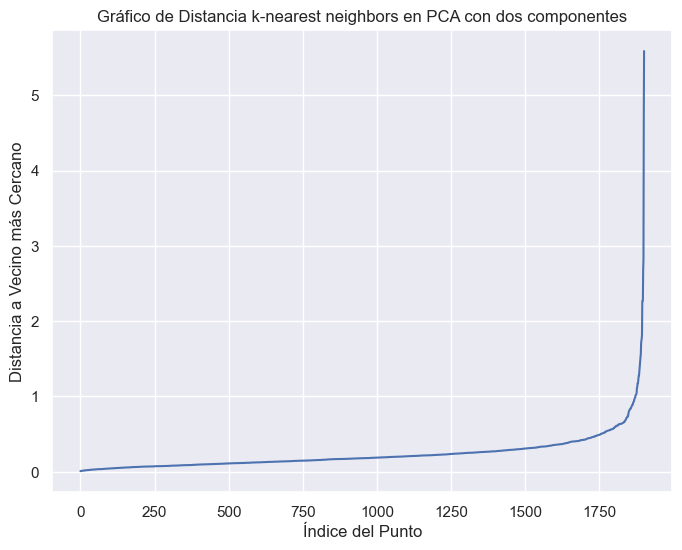

In [10]:
# (d) Repetir el agrupamiento utilizando DBSCAN. ¿C´omo eligirían en este caso un valor de ε apropiado? 

# Calcular el gráfico de distancia k-nearest neighbors
nn = NearestNeighbors(n_neighbors=2)
nn.fit(df_pca)

# Ordenar de menor a mayor las distancias
distances, _ = nn.kneighbors(df_pca)
distances = distances[:,1]
distances = np.sort(distances, axis=0)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('Gráfico de Distancia k-nearest neighbors en PCA con dos componentes')
plt.xlabel('Índice del Punto')
plt.ylabel('Distancia a Vecino más Cercano')
plt.grid(True)
plt.show()

Mirando el gráfico de distancia podemos seleccionar un valor adecuado de epsilon. Este será aquel en donde la curva haga un codo, así tenemos un valor pequeño que incluye a la mayoria de los datos.

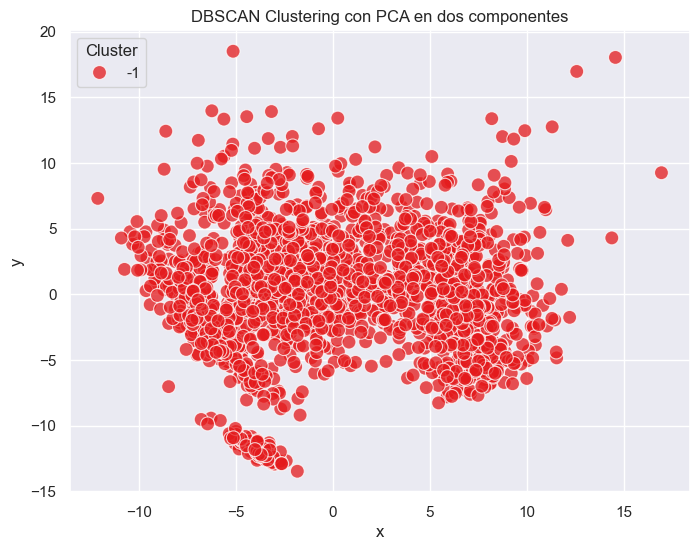

In [38]:
epsilon = 0.75   # Epsilon elegido según gráfico

# Calcular DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=2) 
df_pca['Cluster'] = dbscan.fit_predict(df_scaled)

# Graficar
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='Cluster', data=df_pca, s=100, palette='Set1', alpha=0.75, legend='full')
plt.title('DBSCAN Clustering con PCA en dos componentes')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

Podemos ver que no separa como deseamos los clusters, una mejor aproximación sería ampliando el radio:

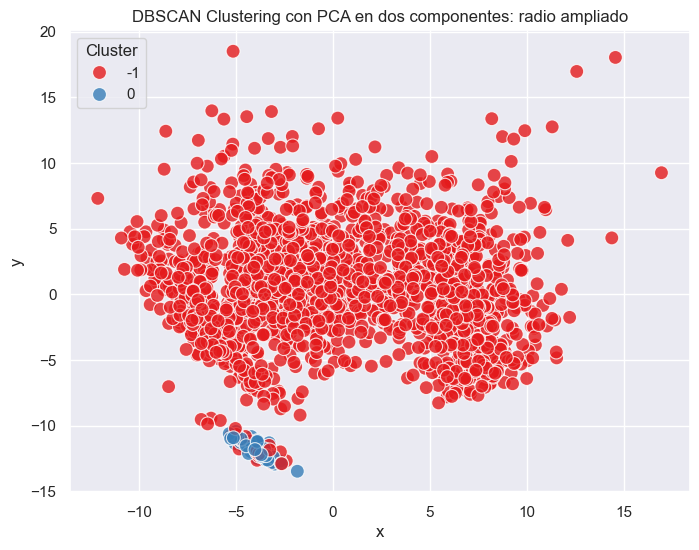

In [41]:
epsilon = 3   # Epsilon elegido según gráfico

# Calcular DBSCAN
dbscan = DBSCAN(eps=epsilon, min_samples=3) 
df_pca['Cluster'] = dbscan.fit_predict(df_scaled)

# Graficar
plt.figure(figsize=(8, 6))
sns.scatterplot(x='x', y='y', hue='Cluster', data=df_pca, s=100, palette='Set1', alpha=0.8, legend='full')
plt.title('DBSCAN Clustering con PCA en dos componentes: radio ampliado')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()

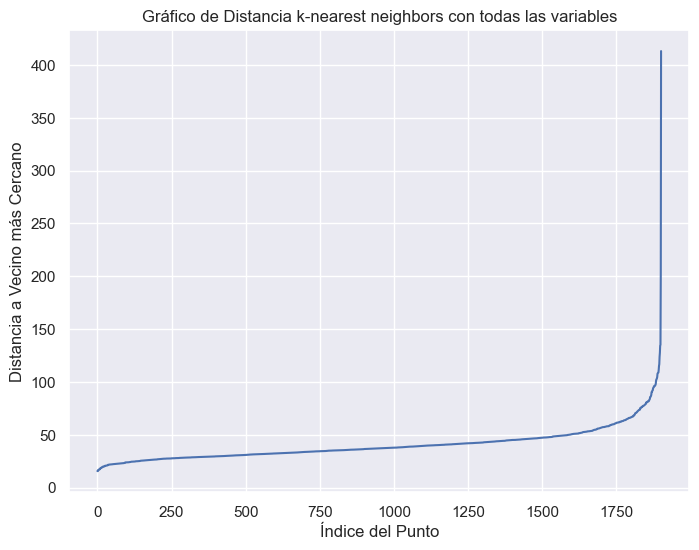

In [13]:
#(e) Utilizar DBSCAN para realizar agrupamiento utilizando como datos todas las variables originales en vez de solo las dos 
# componentes principales, modificando los valores de epsilon y minPts convenientemente. 
# ¿Con cuál de las dos opciones obtienen mejores resultados?

# Calcular el gráfico de distancia k-nearest neighbors pero ahora con todas las variables originales
nn = NearestNeighbors(n_neighbors=2)
nn.fit(data_num)

# Ordenar de menor a mayor las distancias
distances, _ = nn.kneighbors(data_num)
distances = distances[:,1]
distances = np.sort(distances, axis=0)

# Graficar
plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('Gráfico de Distancia k-nearest neighbors con todas las variables')
plt.xlabel('Índice del Punto')
plt.ylabel('Distancia a Vecino más Cercano')
plt.grid(True)
plt.show()

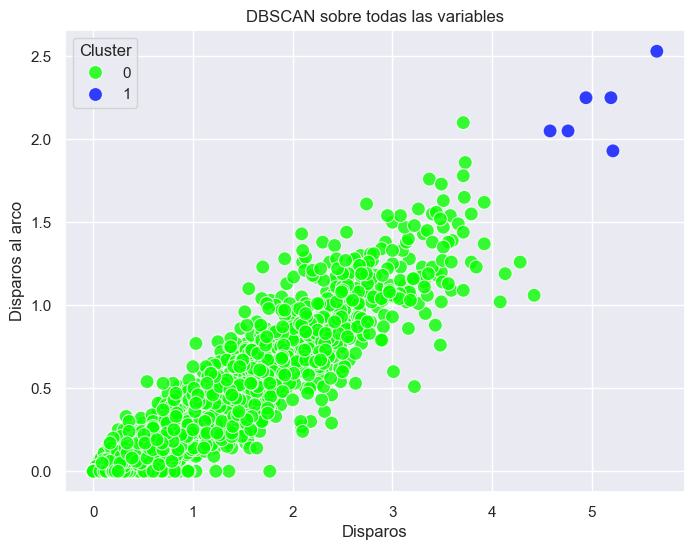

In [46]:
# Configurar y ajustar DBSCAN
dbscan = DBSCAN(eps=0.75, min_samples=2)  
clusters = dbscan.fit_predict(data_num[["Shots/90","SoTs/90"]])

data_num['Cluster'] = clusters
palette = sns.color_palette("hsv", len(set(clusters)))  # Generar una paleta de colores

# Añadir los resultados de DBSCAN al plot
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))

# Graficar los resultados de DBSCAN usando variables que ofrezcan mejor separación
sns.scatterplot(x=data_num['Shots/90'], y=data_num['SoTs/90'], hue='Cluster', data=data_num, s=100, palette=palette, alpha=0.8, legend='full')
plt.title('DBSCAN sobre todas las variables')
plt.xlabel('Disparos')
plt.ylabel('Disparos al arco')
plt.show()

Finalmente, a partir de este gráfico, podemos deducir que con todas las variables DBSCAN clasifica mejor.

## 3. Clasificación

7. Ahora queremos poder predecir la posición en la que juega cada jugador según sus datos
estadísticos utilizando KNN.

In [15]:
#(a) Definir la variable Pos_filt que es la columna Pos, pero donde los jugadores deben tener una sola posición 

# Crear Pos_filt quedándose solo con la primera posición listada
data_futbol['Pos_filt'] = data_futbol['Pos'].apply(lambda x: x.split(',')[0] if pd.notnull(x) else x)

data_futbol

,Player,Nation,Pos,Squad,Comp,Age,Born,MP,Starts,Min,...,ProgCarry/90,CarryIntoThird/90,CarryIntoBox/90,Miscontrol/90,Dispossessed/90,PassTarget/90,PassesReceived/90,PassRec%,ProgPassReceived/90,Pos_filt
0,Patrick van Aanholt,nl NED,DF,Crystal Palace,eng Premier League,29.0,1990.0,22,20,1777,...,5.79,1.52,0.46,0.66,0.81,42.3,39.3,92.8,2.34,DF
1,Yunis Abdelhamid,ma MAR,DF,Reims,fr Ligue 1,32.0,1987.0,33,33,2889,...,1.81,0.25,0.03,0.25,0.47,43.8,42.5,97.0,0.22,DF
2,Pape Abou Cisse,sn SEN,DF,Saint-Étienne,fr Ligue 1,24.0,1995.0,14,14,1260,...,1.14,0.07,0.00,0.14,0.07,33.7,32.9,97.7,0.00,DF
3,David Abraham,ar ARG,DF,Eint Frankfurt,de Bundesliga,34.0,1986.0,14,14,1222,...,3.24,0.66,0.00,0.22,0.00,34.8,33.4,96.0,0.59,DF
4,Francesco Acerbi,it ITA,DF,Lazio,it Serie A,32.0,1988.0,32,32,2813,...,3.71,1.02,0.03,0.45,0.26,50.9,49.5,97.3,0.70,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1897,Reinhold Yabo,de GER,"MF,FW",Arminia,de Bundesliga,28.0,1992.0,13,8,647,...,3.47,1.39,0.42,0.97,0.97,31.1,21.0,67.4,2.78,MF
1898,Amin Younes,de GER,"MF,FW",Eint Frankfurt,de Bundesliga,26.0,1993.0,26,16,1391,...,8.71,2.00,1.03,2.19,2.58,58.1,44.3,76.2,8.26,MF
1899,Mattia Zaccagni,it ITA,"MF,FW",Hellas Verona,it Serie A,25.0,1995.0,36,33,2609,...,7.45,2.52,1.10,2.31,2.86,49.2,35.5,72.1,8.21,MF
1900,Arber Zeneli,xk KVX,"MF,FW",Reims,fr Ligue 1,25.0,1995.0,28,14,1289,...,5.24,1.40,1.12,2.94,2.45,40.3,28.0,69.3,6.15,MF


In [16]:
# (b) Dividir el DataFrame data_num y la Series Pos_filt utilizando un 80% para entrenamiento y un 20% para testeo

# Escalar los datos
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_num)

# Definir X (características) e y (etiquetas)
X = data_scaled
y = data_futbol['Pos_filt']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1521, 106) (381, 106) (1521,) (381,)


In [17]:
# (c) Aplicar un esquema de validación en el conjunto de entrenamiento para seleccionar el valor óptimo de K.
k_values = list(range(1, 10)) 
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')  
    cv_scores.append(scores.mean())

# Encontrar el valor óptimo de K
optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'El valor óptimo de K es {optimal_k}')

El valor óptimo de K es 7


In [18]:
# (d) Para el valor de K obtenido, ¿cuál es el porcentaje de aciertos en el conjunto de testeo?
# Definir y entrenar el modelo KNN
knn = KNeighborsClassifier(n_neighbors=7)  
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
precision = accuracy_score(y_test, y_pred)
print(f'Precisión: {precision:.2f}')

Precisión: 0.92


In [19]:
# (e) Repetir el procedimiento utilizando la primeras dos componentes principales en vez de todas las variables. 
# Indicar si se obtienen mejores resultados.

# Definir df_PCA
df_pca = pd.DataFrame(data=componentes_principales, columns=["x","y"])

# Definir de nuevo X (características) e y (etiquetas)
X = df_pca
y = data_futbol['Pos_filt']

# Separar en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Buscar K óptimo
k_values = list(range(1, 10)) 
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')  
    cv_scores.append(scores.mean())

optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'El valor óptimo de K es {optimal_k}')

# Definir KNN con el K óptimo encontrado
knn = KNeighborsClassifier(n_neighbors=optimal_k)  
knn.fit(X_train, y_train)

# Realizar predicciones
y_pred = knn.predict(X_test)

# Evaluar el modelo
precision = accuracy_score(y_test, y_pred)
print(f'Precisión: {precision:.2f}')



El valor óptimo de K es 3
Precisión: 0.70


En conclusión, es mucho más preciso cuando se utiliza el dataset con todas las variables, ya que cuando se utiliza PCA con dos componentes principales se pierde información y por lo tanto KNN es menos preciso (un 22% exactamente).

In [20]:
# 8. Repetir el mismo método de clasificación con el dataset de jugadoras de la liga inglesa femenina superleague2023.csv. 
# Para esto, quedarse con la columna Pos y las columnas a partir de MP, inclusive. 
# ¿Qué porcentaje de aciertos obtienen en este caso? ¿Puede modificarse el parámetro para obtener un porcentaje mayor?
data_fem = pd.read_csv('superleague2023.csv')
# Seleccionar las comulnas desde 'MP' en adelante junto con 'Pos'
data_femenino = data_fem[['Pos'] + list(data_fem.columns[data_fem.columns.get_loc('MP'):])].copy()
# Quedarse con las columnas 'Pos' y 'Pos_filt' (por las dudas)
data_femenino['Pos_filt'] = data_femenino['Pos'].apply(lambda x: x.split(',')[0] if ',' in x else x)
data_femenino


,Pos,MP,Starts,Min,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,...,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG,Pos_filt
0,"MF,FW",11,0,87,1.0,0,1,1,0,0,...,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03,MF
1,FW,1,0,6,0.1,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,FW
2,MF,1,0,1,0.0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,MF
3,MF,16,10,923,10.3,1,2,3,1,0,...,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15,MF
4,DF,6,4,296,3.3,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06,DF
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299,DF,2,1,118,1.3,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,DF
300,MF,22,22,"1,980",22.0,1,6,7,0,1,...,0.27,0.32,0.0,0.27,0.07,0.27,0.34,0.04,0.30,MF
301,MF,20,18,"1,568",17.4,0,1,1,0,0,...,0.06,0.06,0.0,0.06,0.03,0.06,0.09,0.03,0.09,MF
302,GK,18,18,"1,620",18.0,0,0,0,0,0,...,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,GK


In [21]:
# Guardar otro df que se quede solo con las columnas numéricas desde 'MP' en adelante
data_num_fem = data_femenino.select_dtypes(include='number').loc[:, 'MP':]
data_num_fem.dropna(inplace=True)
data_num_fem.head()


,MP,Starts,90s,Performance_Gls,Performance_Ast,Performance_G+A,Performance_G-PK,Performance_PK,Performance_PKatt,Performance_CrdY,...,Per90Minutes_Gls,Per90Minutes_Ast,Per90Minutes_G+A,Per90Minutes_G-PK,Per90Minutes_G+A-PK,Per90Minutes_xG,Per90Minutes_xAG,Per90Minutes_xG+xAG,Per90Minutes_npxG,Per90Minutes_npxG+xAG
0,11,0,1.0,0,1,1,0,0,0,0,...,0.0,1.03,1.03,0.0,1.03,0.03,0.00,0.03,0.03,0.03
1,1,0,0.1,0,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
2,1,0,0.0,0,0,0,0,0,0,0,...,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00
3,16,10,10.3,1,2,3,1,0,0,4,...,0.1,0.20,0.29,0.1,0.29,0.04,0.12,0.15,0.04,0.15
4,6,4,3.3,0,0,0,0,0,0,1,...,0.0,0.00,0.00,0.0,0.00,0.06,0.00,0.06,0.06,0.06


In [22]:
# Escalar los datos
scaler_fem = StandardScaler()
data_scaled_femenino = scaler_fem.fit_transform(data_num_fem)

# Definir X (características) e y (etiquetas)
X_femenino = data_scaled_femenino
y_femenino = data_femenino['Pos_filt']

# Separar en conjunto de entrenamiento y prueba
X_train_femenino, X_test_femenino, y_train_femenino, y_test_femenino = train_test_split(X_femenino, y_femenino, test_size=0.2, random_state=42)

# Mostrar la forma de los conjuntos
print(X_train_femenino.shape, X_test_femenino.shape, y_train_femenino.shape, y_test_femenino.shape)

(243, 28) (61, 28) (243,) (61,)


In [23]:
k_values_fem = list(range(1, 21)) 
cv_scores_fem = []
for k in k_values_fem:
    knn_femenino = KNeighborsClassifier(n_neighbors=k)
    scores_fem = cross_val_score(knn_femenino, X_train_femenino, y_train_femenino, cv=21, scoring='accuracy')  
    cv_scores_fem.append(scores_fem.mean())

# Encontrar el valor óptimo de K
optimal_k_fem = k_values_fem[cv_scores_fem.index(max(cv_scores_fem))]
print(f'El valor óptimo de K es {optimal_k_fem}')

El valor óptimo de K es 15


In [24]:
# Hacer KNN
knn_femenino = KNeighborsClassifier(n_neighbors=15)  
knn_femenino.fit(X_train_femenino, y_train_femenino)

# Realizar predicciones
y_pred_femenino = knn_femenino.predict(X_test_femenino)

# Evaluar el modelo
precision_fem = accuracy_score(y_test_femenino, y_pred_femenino)
print(f'Precisión: {precision_fem:.2f}')

Precisión: 0.72


In [25]:
# Repetimos el procedimiento utilizando la primeras dos componentes principales en vez de todas las variables.
pca = PCA(n_components=2)
componentes_principales_f = pca.fit_transform(data_scaled_femenino) # Aplicar PCA

# Definir de nuevo X (características) e y (etiquetas)
X = componentes_principales_f
y = data_femenino['Pos_filt']

# Separar en conjunto de entrenamiento y prueba
X_train_femenino, X_test_femenino, y_train_femenino, y_test_femenino = train_test_split(X_femenino, y_femenino, test_size=0.2, random_state=42)

# Buscar K óptimo
k_values = list(range(1, 21)) 
cv_scores = []
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_femenino, y_train_femenino, cv=21, scoring='accuracy')  
    cv_scores.append(scores.mean())

optimal_k = k_values[cv_scores.index(max(cv_scores))]
print(f'El valor óptimo de K es {optimal_k}')

# Definir KNN con el K óptimo encontrado
knn = KNeighborsClassifier(n_neighbors=optimal_k)  
knn.fit(X_train_femenino, y_train_femenino)

# Realizar predicciones
y_pred_femenino = knn.predict(X_test_femenino)

# Evaluar el modelo
precision = accuracy_score(y_test_femenino, y_pred_femenino)
print(f'Precisión: {precision:.2f}')



El valor óptimo de K es 15
Precisión: 0.72


Podemos observar que en ambos casos el valor del parámetro K óptimo es 15, por lo tanto cualquier otro que elijamos no hará otra cosa que reducir la precisión del algoritmo.

## 4. Recomendaciones de jugadores

9. Trabajamos ahora con el dataset `transfermarkt_fbref_201920.csv` que incluye la valuación
de los jugadores. Una de las aplicaciones más comunes de análisis de datos en el fútbol es para
obtener recomendaciones de jugadores a comprar.

In [26]:
#(a) En 2021 Messi fue transferido del Barcelona al PSG. Basándose en los datos disponibles, 
# recomendarle a Barcelona un jugador de características similares a Messi pero de menor valor.
data_jugadores = pd . read_csv('transfermarkt_fbref_201920.csv', delimiter =';')
data_jugadores.head()


,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,Pts/G,xG,xGA,xGDiff,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season
0,21,Martin Aguirregabiria,es ESP,DF,Alavés,23,1996,4000000,178,Defender - Right-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
1,390,Oliver Burke,sco SCO,"MF,FW",Alavés,22,1997,4000000,188,Forward - Right Winger,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
2,430,Ví­ctor Camarasa,es ESP,MF,Alavés,25,1994,4000000,183,Midfielder - Central Midfield,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
3,737,Rubén Duarte,es ESP,DF,Alavés,23,1995,4000000,172,Defender - Left-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#
4,770,Rodrigo Ely,br BRA,DF,Alavés,25,1993,1000000,188,Defender - Centre-Back,...,1.03,37.0,53.2,-16.2,-0.43,"12,177",0,0,0.0,201920#


In [27]:
# Quedarse con las variables numéricas
data_jugadores_num = data_jugadores.select_dtypes(include='number').loc[:, 'minutes':].fillna(0)
data_jugadores_num

,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
0,2099,1,1,0,0,5,1,0.04,0.04,0.09,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
1,1429,1,2,0,0,2,0,0.06,0.13,0.19,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
2,1293,0,1,0,0,1,0,0.00,0.07,0.07,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
3,2663,0,1,0,0,11,0,0.00,0.03,0.03,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
4,2121,2,0,0,0,9,1,0.08,0.00,0.08,...,-25,39,1.03,37.0,53.2,-16.2,-0.43,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2639,289,1,0,0,0,0,0,0.31,0.00,0.31,...,11,59,1.55,47.1,34.8,12.3,0.32,0,0,0.0
2640,2705,2,1,0,0,12,1,0.07,0.03,0.10,...,11,59,1.55,47.1,34.8,12.3,0.32,0,0,0.0
2641,2605,4,9,0,0,1,0,0.14,0.31,0.45,...,11,59,1.55,47.1,34.8,12.3,0.32,0,0,0.0
2642,163,0,0,0,0,1,0,0.00,0.00,0.00,...,11,59,1.55,47.1,34.8,12.3,0.32,0,0,0.0


In [28]:
# Buscar los datos de Messi
messi_data = data_jugadores[data_jugadores['player'] == 'Lionel Messi']
messi_data_num = messi_data.loc[:, data_jugadores_num.columns]
messi_data_num

,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
257,2880,25,21,5,5,4,0,0.78,0.66,1.44,...,48,82,2.16,66.4,36.0,30.4,0.8,1,0,0.0


In [59]:
# Calcular la distancia euclidiana entre Messi y todos los jugadores
distances = euclidean_distances(data_jugadores_num.values, messi_data_num.values.reshape(1, -1))

# Añadir las distancias al dataframe data_jugadores
data_jugadores['distancia_a_messi'] = distances.flatten()

# Obtener el valor de mercado de Messi para filtrar
messi_value = messi_data['value'].values[0]

# Filtrar por jugadores cuyo valor de mercado es menor que el de Messi y ordenar por distancia
similar_a_messi = data_jugadores[data_jugadores['value'] < messi_value].sort_values(by='distancia_a_messi')

# Mostrar la recomendación con las columnas de interés
recomendacion = similar_a_messi[['player', 'value','goals','goals_per_shot','goals_assists_per90','assists', 'distancia_a_messi']].reset_index(drop=True).reset_index(drop=True)

# Mostrar el resultado
recomendacion.head()

,player,value,goals,goals_per_shot,goals_assists_per90,assists,distancia_a_messi
0,Papu Gómez,15000000,7,0.07,0.73,16,3556.703269
1,Rodrigo De Paul,20000000,7,0.08,0.41,6,3707.485203
2,Theo Hernández,32000000,6,0.12,0.29,3,4366.344913
3,Piotr Zieliński,32000000,2,0.03,0.18,4,5697.544198
4,Achraf Hakimi,54000000,5,0.13,0.50,10,5905.669903


In [58]:
# Mismo análisis, pero esta vez usando PCA
pca = PCA(n_components=2)
data_jugadores_pca = pca.fit_transform(data_jugadores_num)
messi_data_pca = pca.transform(messi_data_num)

# Calcular la distancia euclidiana en el espacio PCA
distances = euclidean_distances(data_jugadores_pca, messi_data_pca)

# Agregar las distancias al dataframe
data_jugadores['distancia_a_messi'] = distances.flatten()

# Ordenar por distancia y filtrar por valor menor que el de Messi
messi_value = messi_data['value'].values[0]
similar_a_messi_ = data_jugadores[(data_jugadores['value'] < messi_value)].sort_values(by='distancia_a_messi')

# Mostrar la recomendación con las columnas de interés
recomendacion = similar_a_messi_[['player', 'value','goals','goals_per_shot','goals_assists_per90','assists', 'distancia_a_messi']].reset_index(drop=True)

recomendacion.head()

,player,value,goals,goals_per_shot,goals_assists_per90,assists,distancia_a_messi
0,Rodrigo De Paul,20000000,7,0.08,0.41,6,409.096379
1,Sofyan Amrabat,14000000,1,0.00,0.06,1,1525.453786
2,Papu Gómez,15000000,7,0.07,0.73,16,2315.955910
3,Theo Hernández,32000000,6,0.12,0.29,3,3097.948049
4,Piotr Zieliński,32000000,2,0.03,0.18,4,3185.852365


Sorprendentemente, Papu Gómez habría sido la mejor opción para el Barcelona debido a su cercanía en ambos análisis, su valor y su alta participación en jugadas de gol... Menos mal que no lo compraron.

In [60]:
#(b) Queremos elaborar un modelo para detectar jugadores “baratos”, es decir cuya valuación en el mercado (columna value) 
# sea inferior a que la que nosotros estimemos.

# Datos que nos parecen relevantes
features = ['age', 'minutes', 'goals', 'assists', 'goals_assists_per90']

# Eliminar filas con NaNs en las características seleccionadas
data_model = data_jugadores[features + ['value','player']].dropna()

# Dividir los datos en conjunto de entrenamiento y prueba
X = data_model[features]
y = data_model['value']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crear un modelo de regresion lineal
model = LinearRegression()
model.fit(X_train, y_train)
predicciones = model.predict(X_test)
error = mean_squared_error(y_test, predicciones)

# Identificar los jugadores "baratos" comparando el valor real de los jugadores con el valor predicho.
data_jugadores['valor_predicho'] = model.predict(X)
data_jugadores['diferencia'] = data_jugadores['value'] - data_jugadores['valor_predicho']
jugadores_baratos = data_jugadores[data_jugadores['diferencia'] > 0]
jugadores_baratos.head()

,Column1,player,nationality,position,squad,age,birth_year,value,height,position2,...,xGDiff/90,Attendance,CL,WinCL,CLBestScorer,Season,distancia_a_messi,valor_predicho,diferencia,distancia_a_mbappe
5,826,Ljubomir Fejsa,rs SRB,MF,Alavés,30,1988,2000000,183,Midfielder - Defensive Midfield,...,-0.43,"12,177",0,0,0.0,201920#,30969.509171,6.929005e+05,1.307099e+06,7592.907446
7,1027,John Guidetti,se SWE,FW,Alavés,27,1992,1000000,185,Forward - Centre-Forward,...,-0.43,"12,177",0,0,0.0,201920#,34771.637342,3.185240e+05,6.814760e+05,10556.421537
15,1551,Guillermo Maripán,cl CHI,DF,Alavés,25,1994,11000000,193,Defender - Centre-Back,...,-0.43,"12,177",0,0,0.0,201920#,35062.525225,1.655488e+06,9.344512e+06,10844.086260
18,1871,Fernando Pacheco,es ESP,GK,Alavés,27,1992,14000000,186,Goalkeeper,...,-0.43,"12,177",0,0,0.0,201920#,18828.274254,8.223307e+06,5.776693e+06,20822.411913
23,2121,Roberto,es ESP,GK,Alavés,33,1986,800,192,Goalkeeper,...,-0.43,"12,177",0,0,0.0,201920#,28521.201793,-1.330018e+06,1.330818e+06,8087.634586


In [32]:
# (c) Según el modelo desarrollado, entre los jugadores con un valor de mercado mayor a $100000, ¿quién es el más sobrevalorado? 
jugadores_caros = data_jugadores[data_jugadores['value'] > 100000]
mas_sobrevalorado = jugadores_caros.sort_values(by='diferencia').iloc[-1]
mas_sobrevalorado

Column1                          1602
player                  Kylian Mbappé
nationality                    fr FRA
position                           FW
squad                       Paris S-G
                           ...       
CLBestScorer                      0.0
Season                        201920#
distancia_a_messi        24398.242626
valor_predicho        38116802.544847
diferencia           141883197.455153
Name: 1858, Length: 403, dtype: object

In [33]:
mas_infravalorado = jugadores_caros.sort_values(by='diferencia').iloc[0]
mas_infravalorado


Column1                           448
player               Francesco Caputo
nationality                    it ITA
position                           FW
squad                        Sassuolo
                           ...       
CLBestScorer                      0.0
Season                        201920#
distancia_a_messi        24419.433942
valor_predicho        41914694.629619
diferencia           -36914694.629619
Name: 2118, Length: 403, dtype: object

In [47]:
#(d) El PSG quiere vender a Mbappé y reemplazarlo por otro jugador más barato. 
# Hacer un listado de los 10 jugadores más parecidos a Mbappé según el criterio que elijan.

Replicaremos el proceso realizado con Messi 

In [35]:
# Buscar los datos de Mbappé
mbappe_data = data_jugadores[data_jugadores['player'] == 'Kylian Mbappé']
mbappe_data_num = mbappe_data.loc[:, data_jugadores_num.columns]
mbappe_data_num

,minutes,goals,assists,pens_made,pens_att,cards_yellow,cards_red,goals_per90,assists_per90,goals_assists_per90,...,GDiff,Pts,Pts/G,xG,xGA,xGDiff,xGDiff/90,CL,WinCL,CLBestScorer
1858,1513,18,5,0,0,0,0,1.07,0.3,1.37,...,51,68,2.52,70.9,22.7,48.2,1.78,1,0,0.0


In [57]:
# Calcular la distancia euclidiana entre Mbappé y todos los jugadores
distances = euclidean_distances(data_jugadores_num.values, mbappe_data_num.values.reshape(1, -1))

# Añadir las distancias al dataframe data_jugadores
data_jugadores['distancia_a_mbappe'] = distances.flatten()

# Obtener el valor de mercado de Mbappe para filtrar
mbappe_value = mbappe_data['value'].values[0]

# Filtrar por jugadores cuyo valor de mercado es menor que el de Mbappe y ordenar por distancia
similar_a_mbappe = data_jugadores[data_jugadores['value'] < mbappe_value].sort_values(by='distancia_a_mbappe')

# Mostrar la recomendación con las columnas de interés
recomendacion = similar_a_mbappe[['player', 'value','goals','goals_per_shot','goals_assists_per90','assists', 'distancia_a_mbappe']].reset_index(drop=True)

# Mostrar el resultado
recomendacion.head()

,player,value,goals,goals_per_shot,goals_assists_per90,assists,distancia_a_mbappe
0,Lago Junior,2500000,4,0.03,0.16,0,1035.645886
1,Karim Bellarabi,12000000,4,0.07,0.63,6,1086.912702
2,Harvey Barnes,17000000,6,0.10,0.60,8,1169.549422
3,Ismaila Sarr,22000000,5,0.11,0.40,4,1175.568818
4,Denis Bouanga,8000000,10,0.09,0.57,3,1200.456569


En conclusión, si nos ponemos en el lugar de Nasser Al-Khelaifi, presidente del PSG, la mejor opción en cuanto a relación precio-calidad sería Karim Bellarabi. Además de ser el segundo jugador más cercano a Mbappé y tener un precio relativamente bajo, destaca por su promedio de participación en gol por partido de 0.63, el más alto entre estos jugadores.